In [1]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, plot_roc_curve, roc_curve,r2_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading database_IND.csv file
data = pd.read_csv('database_IND.csv')

In [3]:
# Looking for first five rows
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
# Checking  total number columns and rows
data.shape

(907, 27)

In [5]:
# Checking Null values of each attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
#Checking the datatype of each attribute
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
#removing duplicate values
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(907, 27)

In [9]:
# Removing those attribute which has no value
data.drop(['other_fuel3','wepp_id','generation_gwh_2019','estimated_generation_gwh','country_long','gppd_idnr','url'],axis=1,inplace=True)

In [10]:
data.shape

(907, 20)

In [12]:
# Checking missing values of each attributes
data.isna().sum()

country                     0
name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               906
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

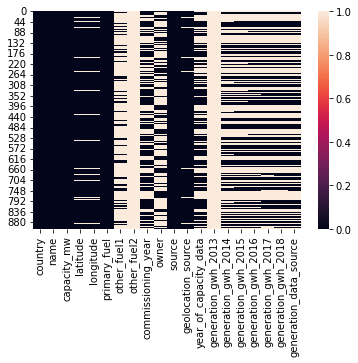

In [14]:
#Looking for null values if any, in heatmap
sns.heatmap(data.isna())
plt.show()

In [15]:
data['generation_gwh_2014'].value_counts()

0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [16]:
#we see this attribute has null values so we filled them with their average
data['latitude'].fillna(data['latitude'].mean(),inplace=True)
data['longitude'].fillna(data['longitude'].mean(),inplace=True)
data['other_fuel1'].fillna(data['other_fuel1'].mode()[0],inplace=True)
data['other_fuel2'].fillna(data['other_fuel2'].mode()[0],inplace=True)
data['commissioning_year'].fillna(data['commissioning_year'].mean(),inplace=True)
data['owner'].fillna(data['owner'].mode()[0],inplace=True)
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0],inplace=True)
data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mean(),inplace=True)
data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean(),inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean(),inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean(),inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean(),inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean(),inplace=True)
data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean(),inplace=True)
data['generation_data_source'].fillna(data['generation_data_source'].mode()[0],inplace=True)

In [17]:
data.isna().sum()

country                     0
name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
commissioning_year          0
owner                       0
source                      0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013       907
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source      0
dtype: int64

In [18]:
#Checking Statistics summary of dataset
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,0.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,0.0,NaN,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,2019.0,NaN,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [19]:
data['generation_gwh_2017'].unique()

array([2.54775930e+03, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [ ]:
#using visuale to understand attributes properly

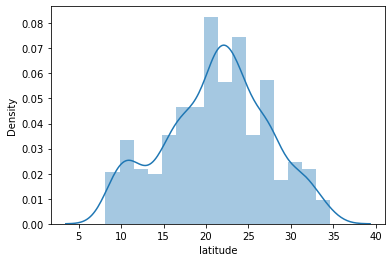

In [20]:
sns.distplot(data['latitude'])
plt.show()

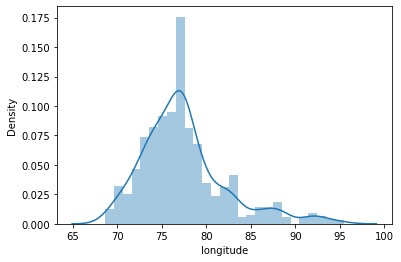

In [21]:
sns.distplot(data['longitude'])
plt.show()

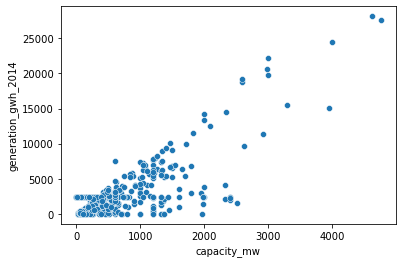

In [22]:
sns.scatterplot(data['capacity_mw'],data['generation_gwh_2014'])
plt.show()

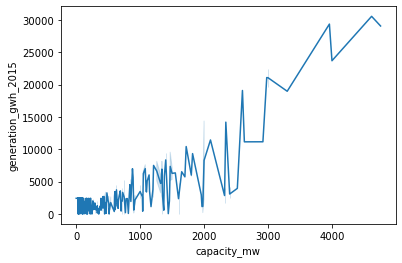

In [23]:
sns.lineplot(data['capacity_mw'],data['generation_gwh_2015'])
plt.show()

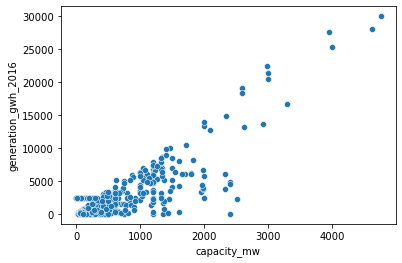

In [24]:
sns.scatterplot(data['capacity_mw'],data['generation_gwh_2016'])
plt.show()

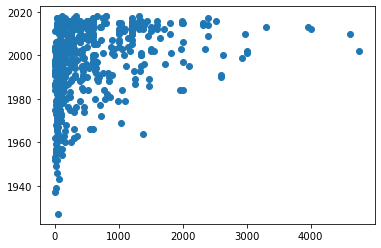

In [25]:
plt.scatter(data['capacity_mw'],data['commissioning_year'])
plt.show()

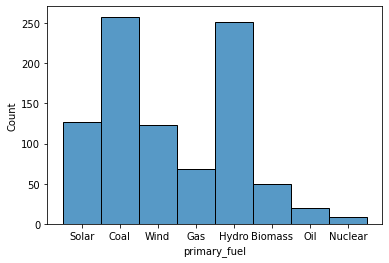

In [26]:
sns.histplot(data['primary_fuel'])
plt.show()

In [28]:
#Checking Correlation
data.corr()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,0.274292,NaN,NaN,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,0.102069,NaN,NaN,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,0.092331,NaN,NaN,0.011472,0.018818,0.039209,0.039675,0.037780
commissioning_year,0.274292,0.102069,0.092331,1.000000,NaN,NaN,0.133051,0.147338,0.170644,0.170863,0.174377
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.694350,0.044321,0.011472,0.133051,NaN,NaN,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,0.147338,NaN,NaN,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,0.170644,NaN,NaN,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,0.170863,NaN,NaN,0.891687,0.928242,0.964649,1.000000,0.982689


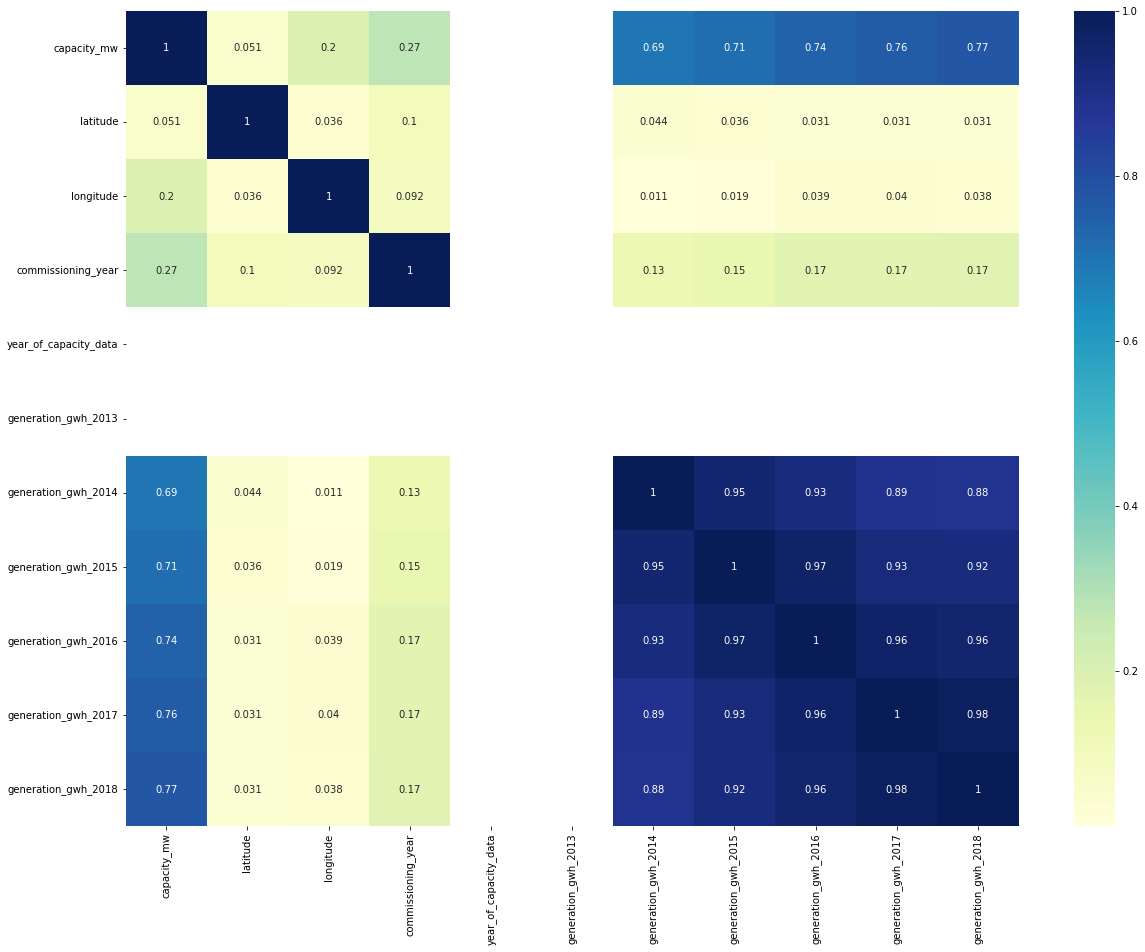

In [29]:
#Checking of correlation of features with each other
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

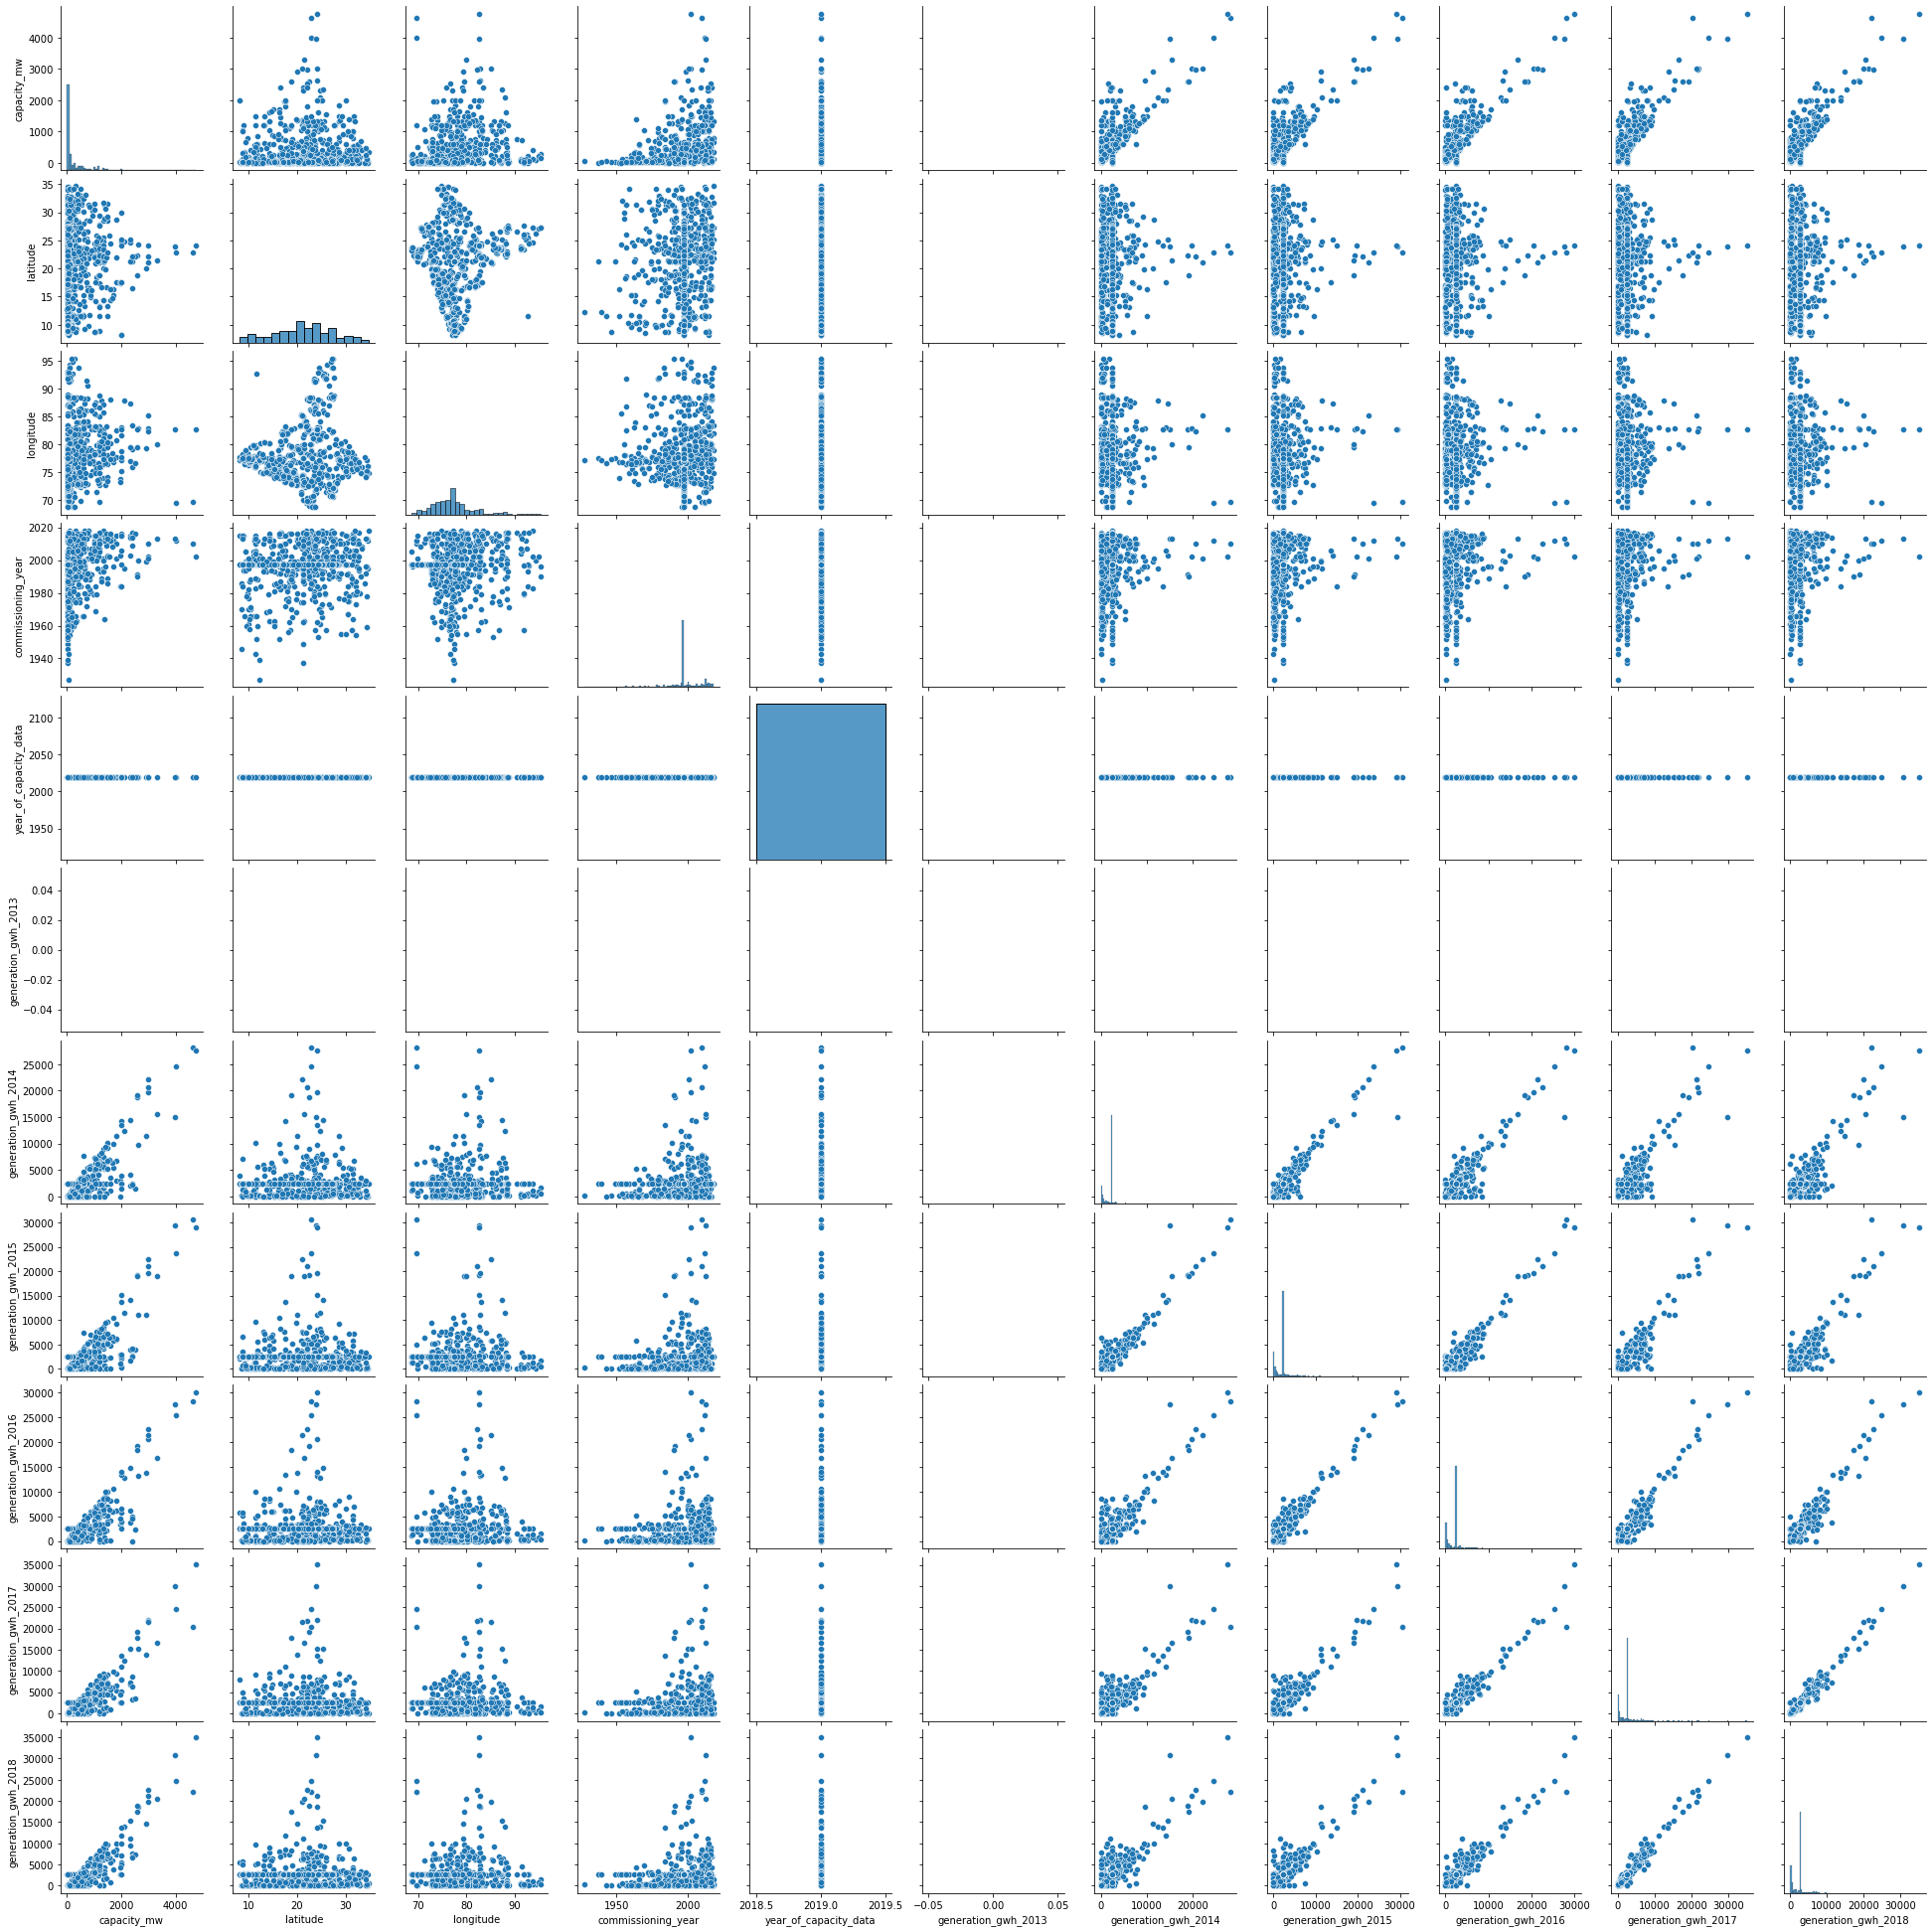

In [30]:
#Drawing Pairplot
sns.pairplot(data)
plt.show()

In [31]:
#Filter categorical features
numerics=['int8','int16','int32','int64','float16','float32','float64']
categorical_columns=[]
features=data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics:
        continue
    categorical_columns.append(col)

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for columns in data.columns:
    data["name"]=le.fit_transform(data["name"])
    data["primary_fuel"]=le.fit_transform(data["primary_fuel"])
    data["other_fuel1"]=le.fit_transform(data["other_fuel1"])
    data["owner"]=le.fit_transform(data["owner"])
    data["source"]=le.fit_transform(data["source"])
    data["geolocation_source"]=le.fit_transform(data["geolocation_source"])
    data["generation_data_source"]=le.fit_transform(data["generation_data_source"])
    data["country"]=le.fit_transform(data["country"])
    data["other_fuel2"]=le.fit_transform(data["other_fuel2"])
    data["commissioning_year"]=le.fit_transform(data["commissioning_year"])
    data["longitude"]=le.fit_transform(data["longitude"])
    data["capacity_mw"]=le.fit_transform(data["capacity_mw"])
    
    
   

In [33]:
data.skew()

country                    0.000000
name                       0.000000
capacity_mw                0.240003
latitude                  -0.149698
longitude                 -0.036790
primary_fuel               0.472251
other_fuel1              -20.453120
other_fuel2                0.000000
commissioning_year        -1.238167
owner                      1.364406
source                     1.827373
geolocation_source        -2.159841
year_of_capacity_data      0.000000
generation_gwh_2013             NaN
generation_gwh_2014        5.035446
generation_gwh_2015        5.364134
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source     0.000000
dtype: float64

In [ ]:
#Removing skewness

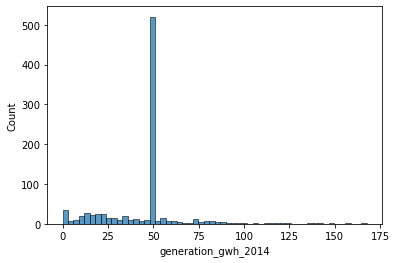

In [34]:
data['generation_gwh_2014'] =np.sqrt(data['generation_gwh_2014'])
sns.histplot(data['generation_gwh_2014'])
plt.show()


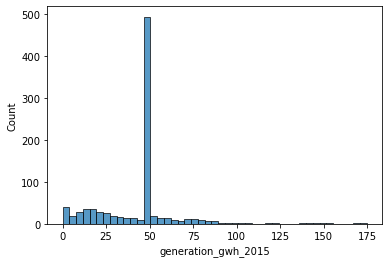

In [35]:
data['generation_gwh_2015'] =np.sqrt(data['generation_gwh_2015'])
sns.histplot(data['generation_gwh_2015'])
plt.show()


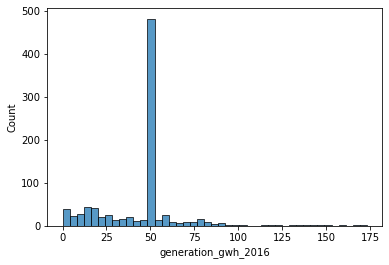

In [36]:
data['generation_gwh_2016'] =np.sqrt(data['generation_gwh_2016'])
sns.histplot(data['generation_gwh_2016'])
plt.show()


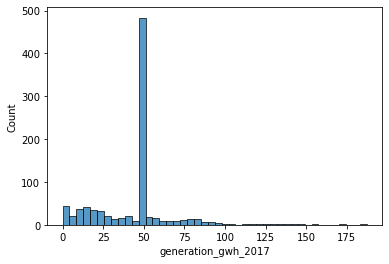

In [37]:
data['generation_gwh_2017']=np.sqrt(data['generation_gwh_2017'])
sns.histplot(data['generation_gwh_2017'])
plt.show()

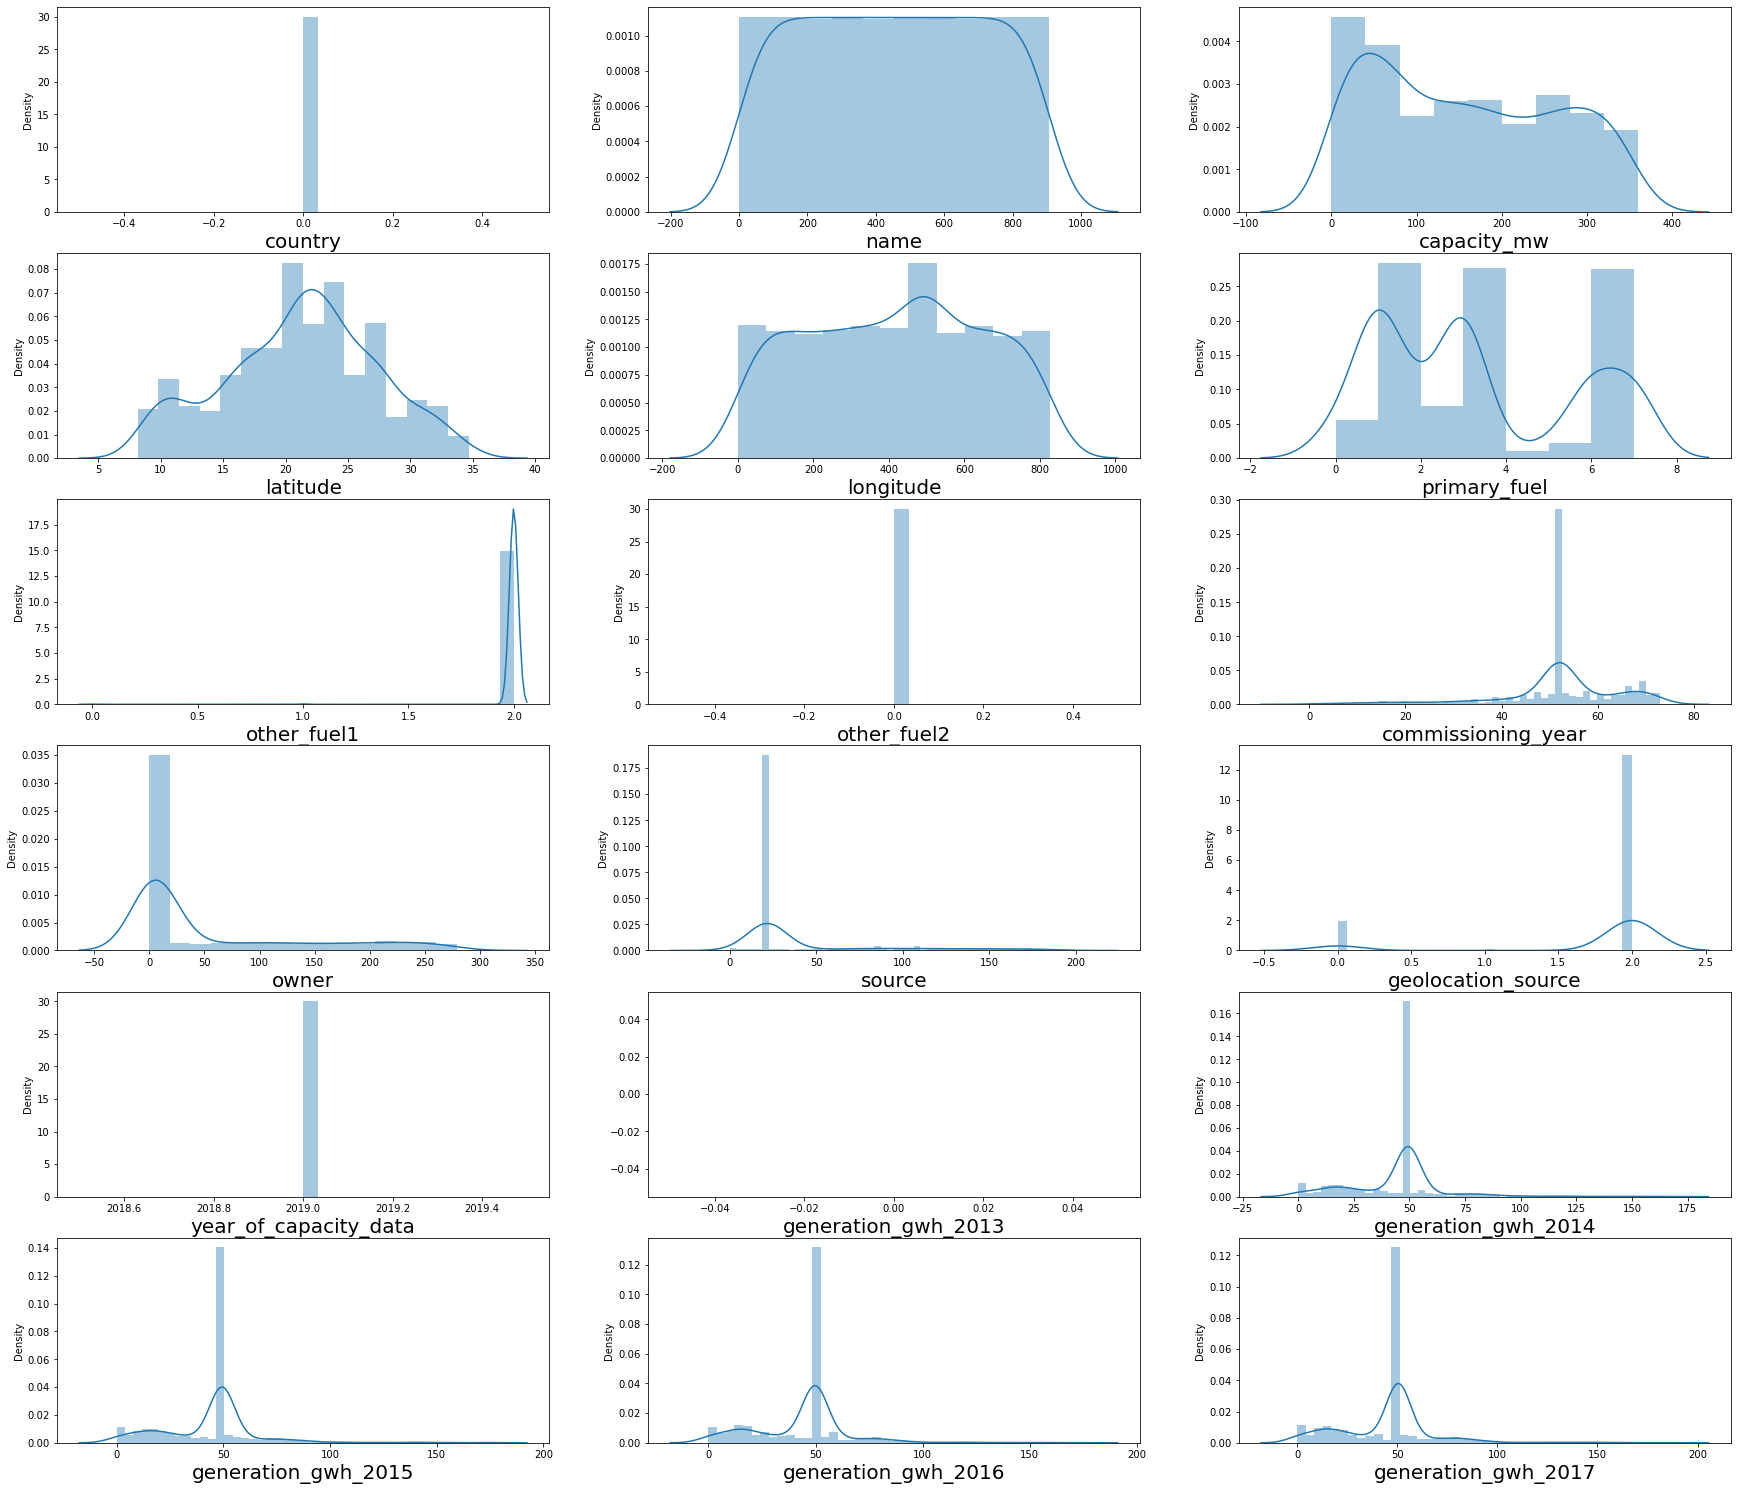

In [38]:
# let's see how data for every column
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18 :  
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [39]:
# Now we split feature and label
x=data.drop("capacity_mw",axis=1)
y=data["capacity_mw"]

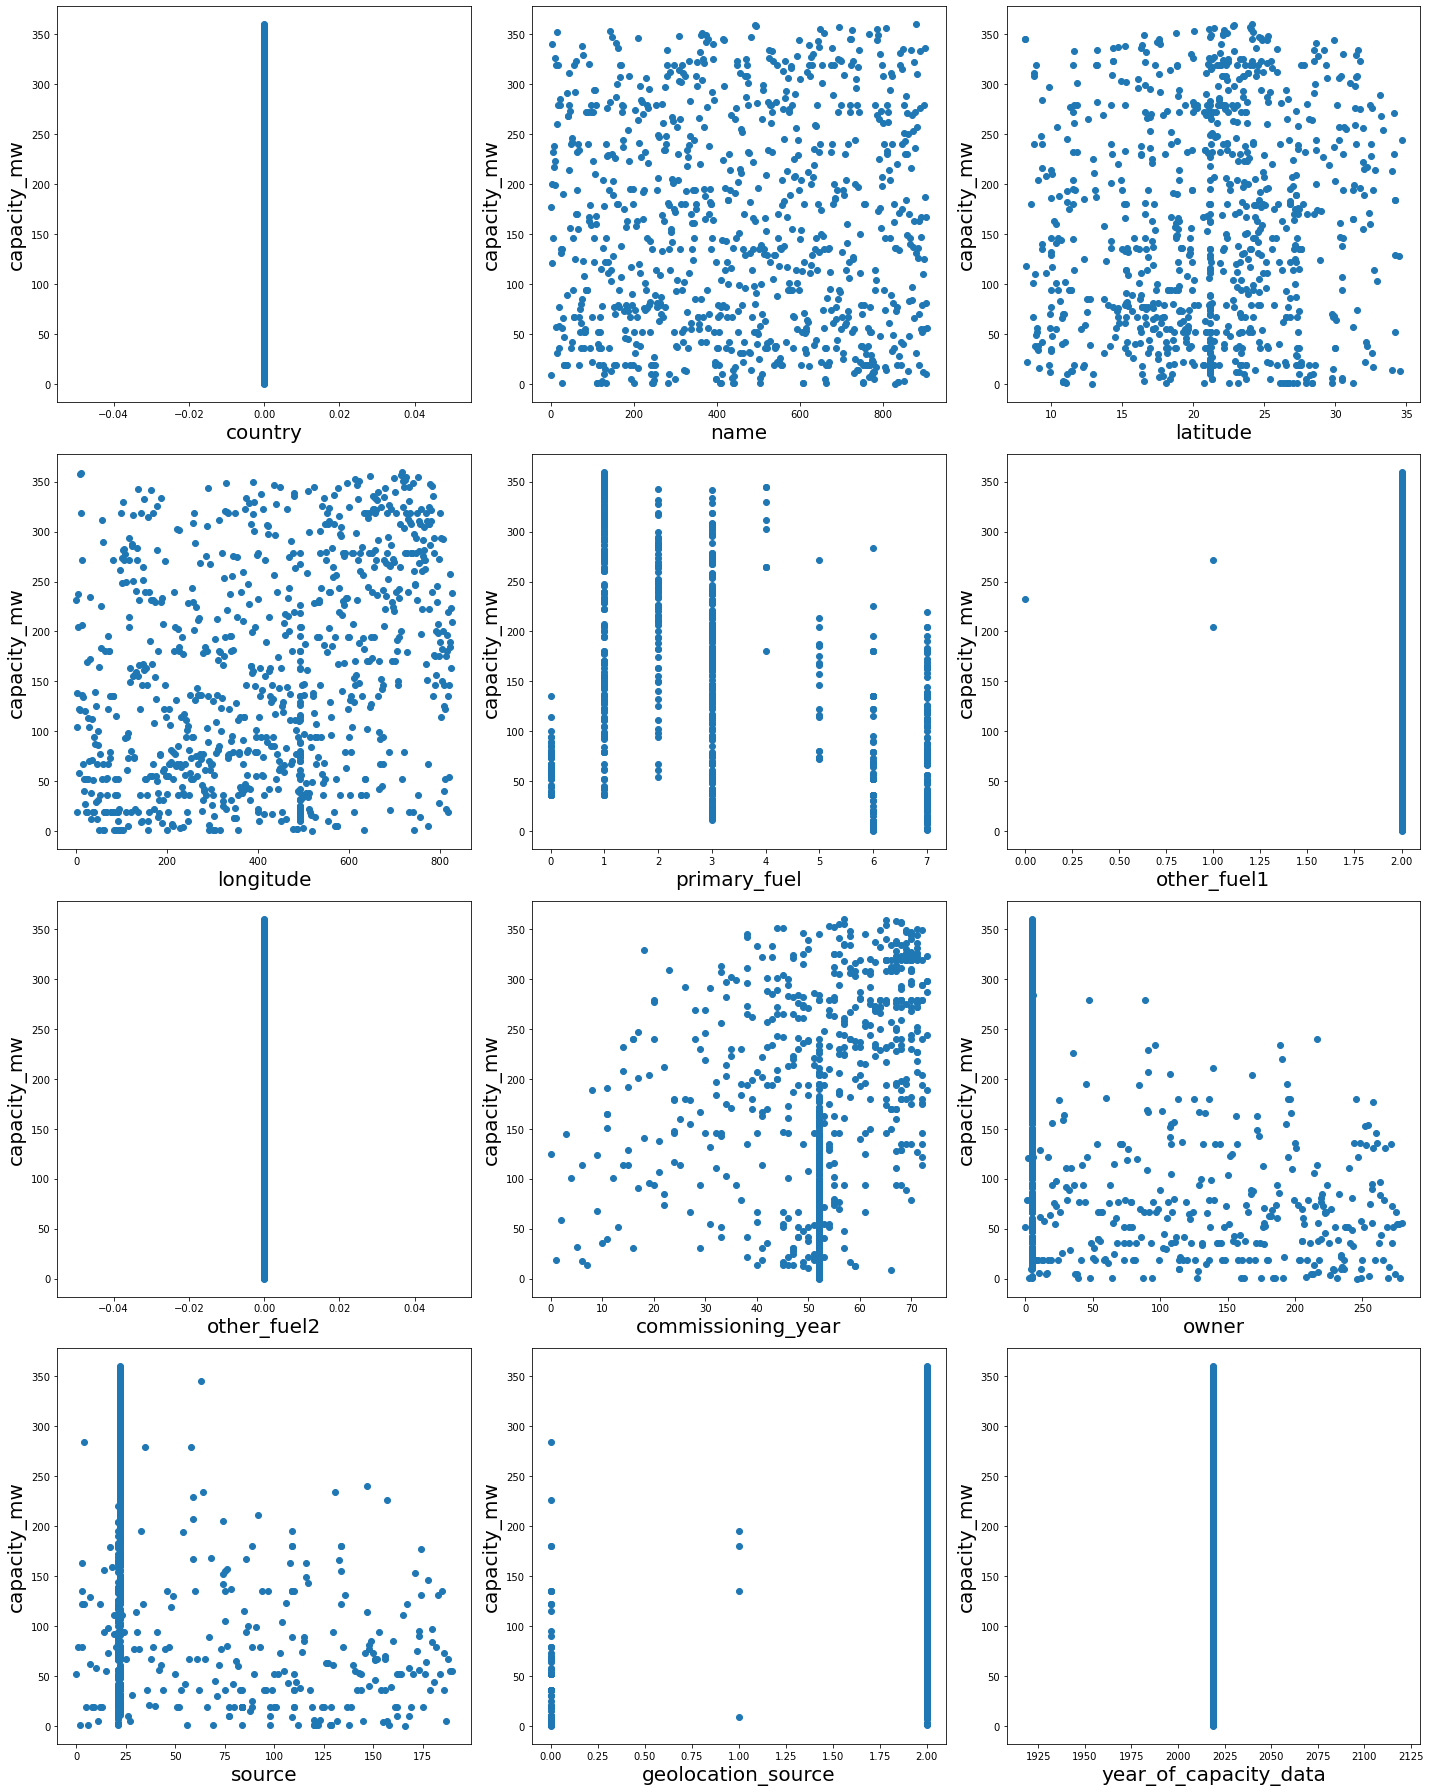

In [40]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=12:
        ax = plt.subplot(4,3, plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('capacity_mw', fontsize = 20)
    plotnumber += 1
plt.tight_layout()

In [41]:
data['capacity_mw'].unique()

array([  9, 177, 121, 200, 340, 232, 146, 217, 238, 223, 326, 199, 319,
        57,  31, 352, 260, 279,  36,  58,  77, 285, 131, 135,   1,  56,
       190,  66,  47,  19, 291,  89, 268, 214, 311, 273, 156, 240, 246,
        42, 242,  94,  67, 125, 292, 170, 323, 194, 155, 234,  75,  52,
        80,  61, 338,  85, 123, 329, 108,  55, 272, 167, 163, 320, 179,
       159,  22, 294, 122, 210, 160, 168,  40, 115,   3,  78, 136, 204,
       178,  10,  15, 276, 228, 111, 229, 282, 353, 114,  13, 103, 347,
       230, 203, 128, 189, 226,  70, 287, 341, 300, 180, 336,  79, 307,
       107, 138, 237, 244, 278,  73, 175,  54,  46, 157, 254,  45, 308,
       195,   5, 117,  90,  74, 274, 158, 346, 264,  16, 241, 120, 298,
        38, 227, 284, 192, 165, 270,  76, 101, 306, 221, 295, 143,  82,
        27,   4,  81, 206, 249,  63, 247, 109,  87, 169, 280, 133, 261,
       297, 248, 334, 181, 312, 152, 142, 205, 267, 201, 263, 172,  93,
       104,  37, 257, 348, 303, 314, 265, 302,  14, 102, 193,  7

In [43]:
x_new=data[['generation_gwh_2017','generation_gwh_2016','generation_gwh_2015','generation_gwh_2014','other_fuel1','geolocation_source','primary_fuel','commissioning_year','owner','source','longitude']]

In [44]:
from sklearn.preprocessing import StandardScaler
score =StandardScaler()
x_score = score.fit_transform(x_new)

In [45]:
#Checking for best random state which give best accuracy
# To find the best random state using logistic Regressor model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

maxAccu=0
maxRS=0

maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.5691468782921947  on Random_state  50


In [46]:
x_train.shape

(634, 11)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.30,random_state=maxRS)

In [51]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [53]:
for m in model:
    print("                                                                      ")
    
    print('accuracy score of ->',m)
    
    m.fit(x_train,y_train)
    
    pred = m.predict(x_test)
    
    print("R2 Score:                ", r2_score(y_test,pred))
    
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    
    score=cross_val_score(m,x_new,y,cv=5)
    
    print(score)
    
    print("cross validation score:  ", abs(score.mean()))
    
    print("Difference between R2 score and cross validatio score is -> ",r2_score(y_test,pred)-abs(score.mean()))
    
    print("                                                                     ")

                                                                      
accuracy score of -> LinearRegression()
R2 Score:                 0.5691468782921947
Mean Absolute Error:      60.59590294410485
Mean Squared error:       5249.333523865469
Root Mean Squared Error:  72.45228446271014
[0.44681724 0.48209562 0.49510829 0.46552801 0.51920876]
cross validation score:   0.48175158414292324
Difference between R2 score and cross validatio score is ->  0.08739529414927144
                                                                     
                                                                      
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.8648091514221121
Mean Absolute Error:      30.024333959691102
Mean Squared error:       1647.108533754581
Root Mean Squared Error:  40.58458492771093
[0.78701099 0.82339989 0.78968675 0.86498183 0.80382863]
cross validation score:   0.8137816183752917
Difference between R2 score and cross validatio score is ->  0

In [ ]:
#we see that RandomForestRegressor is best model and also give highest accuracy 82 and minimum difference

In [ ]:
# Let's Use GridSearchCV for the best parameter to improve the accuracy

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params={'n_estimators':range(0,200),
        'learning_rate':[.001,0.01,.1],
        'max_depth':[1,2,4],
        'subsample':[.5,.75,1]}

In [57]:
gridsearch = GridSearchCV(GradientBoostingRegressor(), param_grid=params,cv = 3, n_jobs = -1)

In [58]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4], 'n_estimators': range(0, 200),
                         'subsample': [0.5, 0.75, 1]})

In [59]:
gridsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 32, 'subsample': 0.5}

In [60]:
# we will use the best parameters in our gbr algorithm and check if accuracy is increasing.
gbr = gridsearch.best_estimator_

In [61]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=32, subsample=0.5)

In [62]:
gbr.score(x_test,y_test)

0.8570991258921059

In [63]:
y_pred =gbr.predict(x_test)

In [64]:
accuracy = r2_score(y_test,y_pred)

In [65]:
accuracy

0.8570991258921059

In [ ]:
#hyperparameter tuning give 85 % accuracy

In [ ]:
import joblib 
joblib.dump(rfr,"global_power_plant_projrect.pkl")